<h1 align="center"><b>Stock Market Technical Analysis</b></h1>
<h2 align="center"><b>Algorithmic Approach</b></h2>
<h2 align="center"><b>for</b></h2>
<h2 align="center"><b>Investing in the Stock Market</b></h2>
<h2 align="center"><b>using Python</b></h2>
<br>
<h1 align="center"><b>Miguel Secillano</b></h1>
<h3 align="center"><b>(2021/2022 Science Fair Project)</b></h3>

<hr>
<br>
<h1 align="center"><b>Notebook</b></h1>
<h2 align="center"><b>S&P 500 Investment</b></h2>
<!-- <h3 align="center"><b>(Initial Experimentation)</b></h3> -->
<br>
<hr>
<br>

In [34]:
# #%%
# %load_ext autoreload
# %autoreload 2

# Load necessary library modules
import pandas as pd # Data Analysis
import yfinance as yf # Yahoo Finance, where the data comes from
import matplotlib.pyplot as plt # Data Visualization
import matplotlib.ticker as mtick # Data Visualization Formatter
import numpy as np # Data Organizer

plt.style.use("seaborn")

In [35]:
def list_dictionary_pairs(dict):
    print_stock_symbol_name(dict)
    for key, value in dict.items():
        print(key, ":", value)


def print_stock_symbol_name(dict):
    print(dict["symbol"] + ":", dict["shortName"])
    print("=" * 40)


def get_historial_data(ticker):
    return ticker.history(period="max")

def get_monthly_historial_data(ticker):
    return yf.download(ticker, interval="1mo")
    # return yf.download(ticker, interval="1mo", start="2008-10-01", end="2021-01-01")

def plot_historical_data(df_history, stock_name):
    # makes plot for data
    plt.figure(figsize=(16,9))
    plt.plot(df_history["Close"], label=f"{stock_name} Close")
    plt.title(f"{stock_name} History", fontsize=25, fontweight="bold")
    plt.xlabel("Time (-current)", fontsize=20)
    plt.ylabel("Closing Price (in U.S. dollars)", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.show()

def calculate_monthly_returns(df_history):
    daily_return_rate = []
    monthly_return_rate = {"01": 0, "02": 0, "03": 0, "04": 0, "05": 0, "06": 0, "07": 0,
                            "08": 0, "09": 0, "10": 0, "11": 0, "12": 0}
    for i in range(1, len(df_history) - 1):
        month = str(df_history.index[i]).split("-")[1]
        drr = df_history["Daily Return"][i]
        daily_return_rate.append((month, drr))
        monthly_return_rate[month] += drr
    return monthly_return_rate

def plot_monthly_returns_accumulative(monthly_return_rate, stock_name):
    # makes monthly bar chart for data
    monthly_cumulative_return = []
    sum = 0

    for month in monthly_return_rate:
        sum += monthly_return_rate[month]
        monthly_cumulative_return.append(sum)

    print(monthly_cumulative_return)

    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(monthly_return_rate.keys(), monthly_cumulative_return)
    plt.title(f"{stock_name} Monthly Historical Returns", fontsize=25, fontweight="bold")
    plt.xlabel("Months", fontsize=20)
    plt.ylabel("Monthly Return Rate", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()

def plot_monthly_returns_yearly(monthly_return_rate, stock_name):
    # makes monthly bar chart for data
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(1, 1, 1)
    plt.bar(monthly_return_rate.keys(), height=monthly_return_rate.values())
    plt.title(f"{stock_name} Monthly Historical Returns", fontsize=25, fontweight="bold")
    plt.xlabel("Months", fontsize=20)
    plt.ylabel("Monthly Return Rate", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()

def plot_historical_data_monthly_returns(mrr, stock_name):
    # makes plot for data
    plt.figure(figsize=(32,9))
    
    figure, axis = plt.subplots(3, 4)

    plt.title(f"{stock_name} History", fontsize=25, fontweight="bold")
    
    months = {"01": [], "02": [], "03": [], "04": [], "05": [], "06": [],
                       "07": [], "08": [], "09": [], "10": [], "11": [], "12": []}

    for year in mrr.values():
        months["01"].append(year["01"])
        months["02"].append(year["02"])
        months["03"].append(year["03"])
        months["04"].append(year["04"])
        months["05"].append(year["05"])
        months["06"].append(year["06"])
        months["07"].append(year["07"])
        months["08"].append(year["08"])
        months["09"].append(year["09"])
        months["10"].append(year["10"])
        months["11"].append(year["11"])
        months["12"].append(year["12"])
        
    for month in months:
        if month == "01":
            axis[0, 0].plot(np.array(months[month]), label=month)
        if month == "02":
            axis[0, 1].plot(np.array(months[month]), label=month)
        if month == "03":
            axis[0, 2].plot(np.array(months[month]), label=month)
        if month == "04":
            axis[0, 3].plot(np.array(months[month]), label=month)
        if month == "05":
            axis[1, 0].plot(np.array(months[month]), label=month)
        if month == "06":
            axis[1, 1].plot(np.array(months[month]), label=month)
        if month == "07":
            axis[1, 2].plot(np.array(months[month]), label=month)
        if month == "08":
            axis[1, 3].plot(np.array(months[month]), label=month)
        if month == "09":
            axis[2, 0].plot(np.array(months[month]), label=month)
        if month == "10":
            axis[2, 1].plot(np.array(months[month]), label=month)
        if month == "11":
            axis[2, 2].plot(np.array(months[month]), label=month)
        if month == "12":
            axis[2, 3].plot(np.array(months[month]), label=month)

        plt.title(f"{month} Month", fontsize=25, fontweight="bold")
        plt.xlabel("Time (-current)", fontsize=20)
        plt.ylabel("Monthly Returns", fontsize=20)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

    plt.show()

In [36]:
def calculate_monthly_returns_per_year(df_history):
    years = {}
    current_year = 0
    monthly_return_rate = {"01": 0, "02": 0, "03": 0, "04": 0, "05": 0, "06": 0,
                       "07": 0, "08": 0, "09": 0, "10": 0, "11": 0, "12": 0}
    for i in range(1, len(df_history) - 1):
        year = str(df_history.index[i]).split("-")[0]
        month = str(df_history.index[i]).split("-")[1]

        if current_year != year:
            years[year] = monthly_return_rate
            current_year = year
            monthly_return_rate = {"01": 0, "02": 0, "03": 0, "04": 0, "05": 0, "06": 0,
                       "07": 0, "08": 0, "09": 0, "10": 0, "11": 0, "12": 0}
        
        if i == len(df_history) - 1:
            years[year] = monthly_return_rate
        
        drr = df_history["Daily Return"][i]
        daily_return_rate.append((month, drr))
        monthly_return_rate[month] += drr
    return years

In [37]:
def plot_monthly_returns_accumulative_year(df_history_monthly, stock_name, year):
    # makes monthly bar chart for data

    monthly_cumulative_return_year = []
    monthly_return_rate = {"01": 0, "02": 0, "03": 0, "04": 0, "05": 0, "06": 0,
                       "07": 0, "08": 0, "09": 0, "10": 0, "11": 0, "12": 0}

    for i in range(1, len(df_history_monthly) - 1):
        year_ = int(str(df_history_monthly.index[i]).split("-")[0])
        # print(year_, year)
        if year_ == year:
            month_ = str(df_history_monthly.index[i]).split("-")[1]
            # print(df_history_monthly["Monthly Return"][i])
            monthly_return_rate[month_] = df_history_monthly["Monthly Return"][i]

    sum_ = 0

    for month in monthly_return_rate:
        sum_ += monthly_return_rate[month]
        monthly_cumulative_return_year.append(sum_)

    print(monthly_return_rate)

    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(monthly_return_rate.keys(), monthly_cumulative_return_year)
    plt.title(f"{stock_name} Monthly Historical Returns in the year {year}", fontsize=25, fontweight="bold")
    plt.xlabel("Months", fontsize=20)
    plt.ylabel("Monthly Return Rate", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()

In [38]:
def plot_historical_rolling_average(df_history, stock_name):
    # plot the high and low averages.
    
    df_history["Rolling Average High"] = df_history["High"].rolling(window=365*5).mean()
    df_history["Rolling Average Low"] = df_history["Low"].rolling(window=365*5).mean()
    df_history["Rolling Average Close"] = df_history["Close"].rolling(window=365*5).mean()

    # makes plot for data

    plt.figure(figsize=(16,9))
    plt.plot(df_history["Rolling Average High"], label=f"{stock_name} Rolling Average (High)")
    plt.plot(df_history["Rolling Average Low"], label=f"{stock_name} Rolling Average (Low)")
    plt.plot(df_history["Rolling Average Close"], label=f"{stock_name} Rolling Average (Close)")
    plt.title(f"{stock_name} History", fontsize=25, fontweight="bold")
    plt.xlabel("Time (-current)", fontsize=20)
    plt.ylabel("Average Price (in U.S. dollars)", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.show()

In [39]:
def investment_cycle(df_history_monthly, init_investment=1, buy=(10,6,3), sell=(9,5,2), name="S&P 500"):
    
    '''
        Strategy:

        ALWAYS use beginning of months as your measurment. Instead of saying...
        BUY at the end of September, SELL at the start of September, you say
        BUY at the start of October, SELL at the start of September.

        This will allow us to stop checking if a day is the first in a month, and
        it stops us from trying to account for the other cases in which the first
        day in a month isn't actually the first day of the S&P 500 (weekands....)

        I will use df_history_monthly as my data frame as it takes the first of every
        month, and accounts for weekands, holidays, etcetra.
    '''

    # cycle calls
    x1, y1 = single_cycle_investment(df_history_monthly, init_investment, (buy[0],), (sell[0],))
    x2, y2 = double_cycle_investment(df_history_monthly, init_investment, (buy[0], buy[1]), (sell[0], sell[1]))
    x3, y3 = double_cycle_investment(df_history_monthly, init_investment, (buy[0], buy[1], buy[2]), (sell[0], sell[1], sell[2]))

    # create a new plot with default tools, using figure
    p = figure(
        x_axis_type = "datetime",
        plot_width = 1200,
        tools="xpan, ywheel_zoom, reset",
        x_axis_location="above",
        x_range=(np.array(df_history_monthly.index)[0], np.array(df_history_monthly.index)[len(df_history_monthly) - 1]),
        # y_range=(np.array(y_axis)[0], np.array(y_axis)[::-1][0]),
        title = name + " - Single Cycle Investment Results"
    )

    # add a circle renderer with x and y coordinates, size, color, and alpha
    # p.circle(x_axis, y_axis, size=15, line_color="navy", fill_color="orange", fill_alpha=0.5)
    p.line(df_history_monthly.index, df_history_monthly["Close"], color='red', legend_label="S&P 500")
    p.line(x1, y1, color='orange', legend_label="Single Cycle Investment")
    # p.line(x2, y2, color='green', legend_label="Double Cycle Investment")
    # p.line(x3, y3, color='blue', legend_label="Triple Cycle Investment")

    select = figure(title="Drag the middle and edges of the Selection Box to Change the Range",
	plot_height=150, plot_width=1200, y_range=p.y_range, x_axis_type="datetime",y_axis_type=None,
	tools="", toolbar_location=None)

    range_tool = RangeTool(x_range=p.x_range)
    range_tool.overlay.fill_color="navy"
    range_tool.overlay.fill_alpha = 0.2

    select.line(df_history_monthly.index, df_history_monthly["Close"], color='red')
    select.line(x1, y1, color='orange')
    # select.line(x2, y2, color='green')
    # select.line(x3, y3, color='blue')
    select.ygrid.gird_line_color=None
    select.add_tools(range_tool)
    select.toolbar.active_multi = range_tool

    # display legend in top left corner (default is top right corner)
    p.legend.location = "top_left"

    # add a title to your legend
    p.legend.title = "Obervations"

    # change appearance of legend text
    p.legend.label_text_color = "navy"

    # change border and background of legend
    p.legend.border_line_width = 3
    p.legend.border_line_color = "navy"
    p.legend.border_line_alpha = 0.8
    p.legend.background_fill_color = "navy"
    p.legend.background_fill_alpha = 0.2

    show(column(p, select)) # show the results

In [40]:
def single_cycle_investment(df_history_monthly, init_investment=1, buy=(10,), sell=(9,), name="S&P 500"):

    money = init_investment
    bought = False
    first_bought = False
    x_axis = []
    y_axis = []

    for i in range(1, len(df_history_monthly)):
        month = int(str(df_history_monthly.index[i]).split("-")[1])
        if month == buy[0]:
            bought = True
            if not first_bought:
                first_bought = True
            money *= 1 + df_history_monthly["Monthly Return"][i]
            x_axis.append(df_history_monthly.index[i])
            y_axis.append(money)
            continue
        if bought:
            if month == sell[0]:
                bought = False
                x_axis.append(df_history_monthly.index[i])
                y_axis.append(money)
                continue
            money *= 1 + df_history_monthly["Monthly Return"][i]
            x_axis.append(df_history_monthly.index[i])
            y_axis.append(money)
        else:
            if first_bought:
                x_axis.append(df_history_monthly.index[i])
                y_axis.append(money)

    return x_axis, y_axis

In [41]:
def double_cycle_investment(df_history_monthly, init_investment=1, buy=(10,6), sell=(9,5), name="S&P 500"):

    money = init_investment
    bought = False
    x_axis = []
    y_axis = []

    for i in range(1, len(df_history_monthly)):
        month = int(str(df_history_monthly.index[i]).split("-")[1])
        if month == buy[0] or month == buy[1]:
            bought = True
            money *= 1 + df_history_monthly["Monthly Return"][i]
            x_axis.append(df_history_monthly.index[i])
            y_axis.append(money)
            continue
        if bought:
            if month == sell[0] or month == sell[1]:
                bought = False
                x_axis.append(df_history_monthly.index[i])
                y_axis.append(money)
                continue
            money *= 1 + df_history_monthly["Monthly Return"][i]
            x_axis.append(df_history_monthly.index[i])
            y_axis.append(money)
        else:
            x_axis.append(df_history_monthly.index[i])
            y_axis.append(money)
            
    return x_axis, y_axis

In [42]:
def triple_cycle_investment(df_history_monthly, init_investment=1, buy=(10,6), sell=(9,5), name="S&P 500"):

    money = init_investment
    bought = False
    x_axis = []
    y_axis = []

    for i in range(1, len(df_history_monthly)):
        month = int(str(df_history_monthly.index[i]).split("-")[1])
        if month == buy[0] or month == buy[1] or month == buy[2]:
            bought = True
            money *= 1 + df_history_monthly["Monthly Return"][i]
            x_axis.append(df_history_monthly.index[i])
            y_axis.append(money)
            continue
        if bought:
            if month == sell[0] or month == sell[1] or month == sell[2]:
                bought = False
                x_axis.append(df_history_monthly.index[i])
                y_axis.append(money)
                continue
            money *= 1 + df_history_monthly["Monthly Return"][i]
            x_axis.append(df_history_monthly.index[i])
            y_axis.append(money)
        else:
            x_axis.append(df_history_monthly.index[i])
            y_axis.append(money)
            
    return x_axis, y_axis

In [43]:
def plot_monthly_returns(stock_name, df):
    # makes monthly bar chart for data

    monthly_return_rate = calculate_monthly_returns(df)

    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(1, 1, 1)
    plt.bar(monthly_return_rate.keys(), height=monthly_return_rate.values())

    year1 = str(df.index[0]).split("-")[0]
    year2 = str(df.index[::-1][0]).split("-")[0]

    plt.title(f"{stock_name} Monthly Historical Returns ({year1}-{year2})", fontsize=25, fontweight="bold")
    plt.xlabel("Months", fontsize=20)
    plt.ylabel("Monthly Return Rate", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()

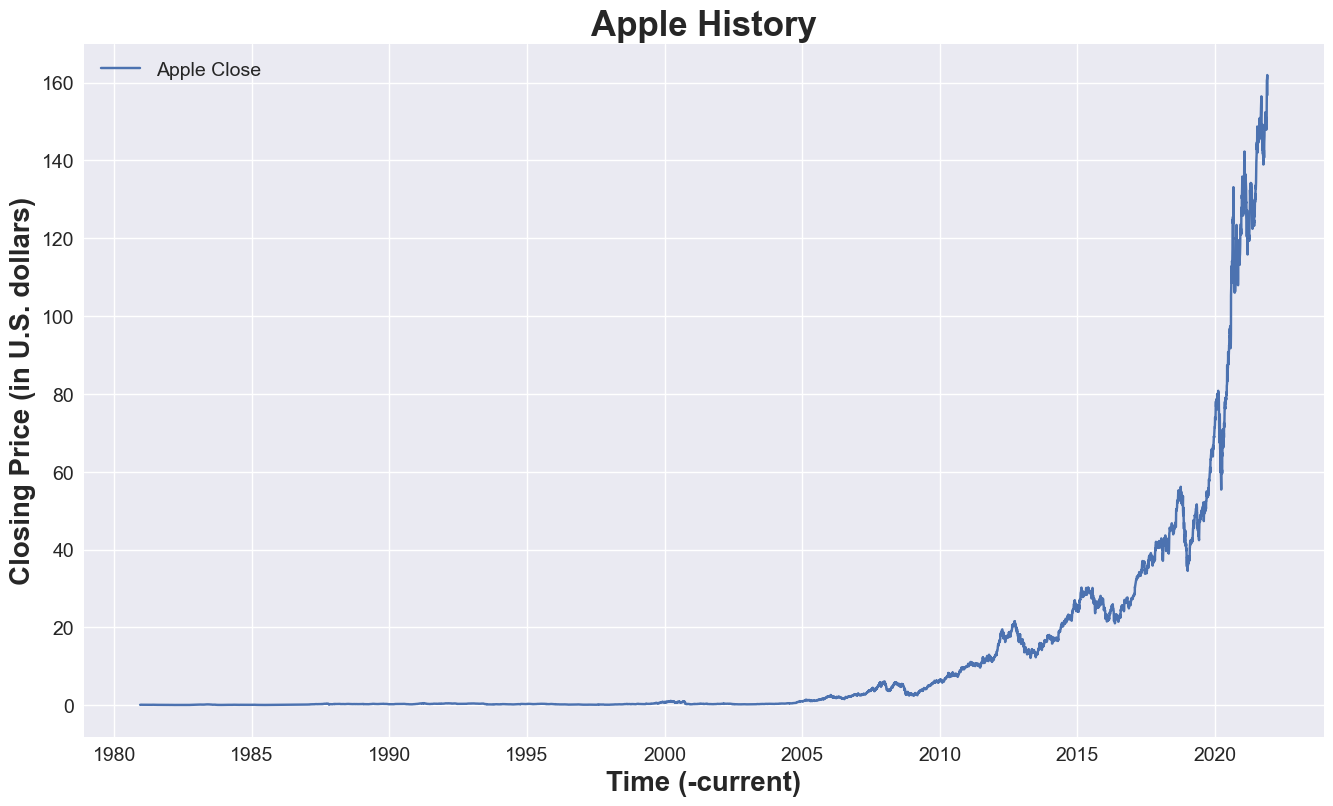

In [44]:
apple = "AAPL" # Apple Stock
apple_ticker = yf.Ticker(apple)
df_history_apple = get_historial_data(apple_ticker)
plot_historical_data(df_history_apple, "Apple")

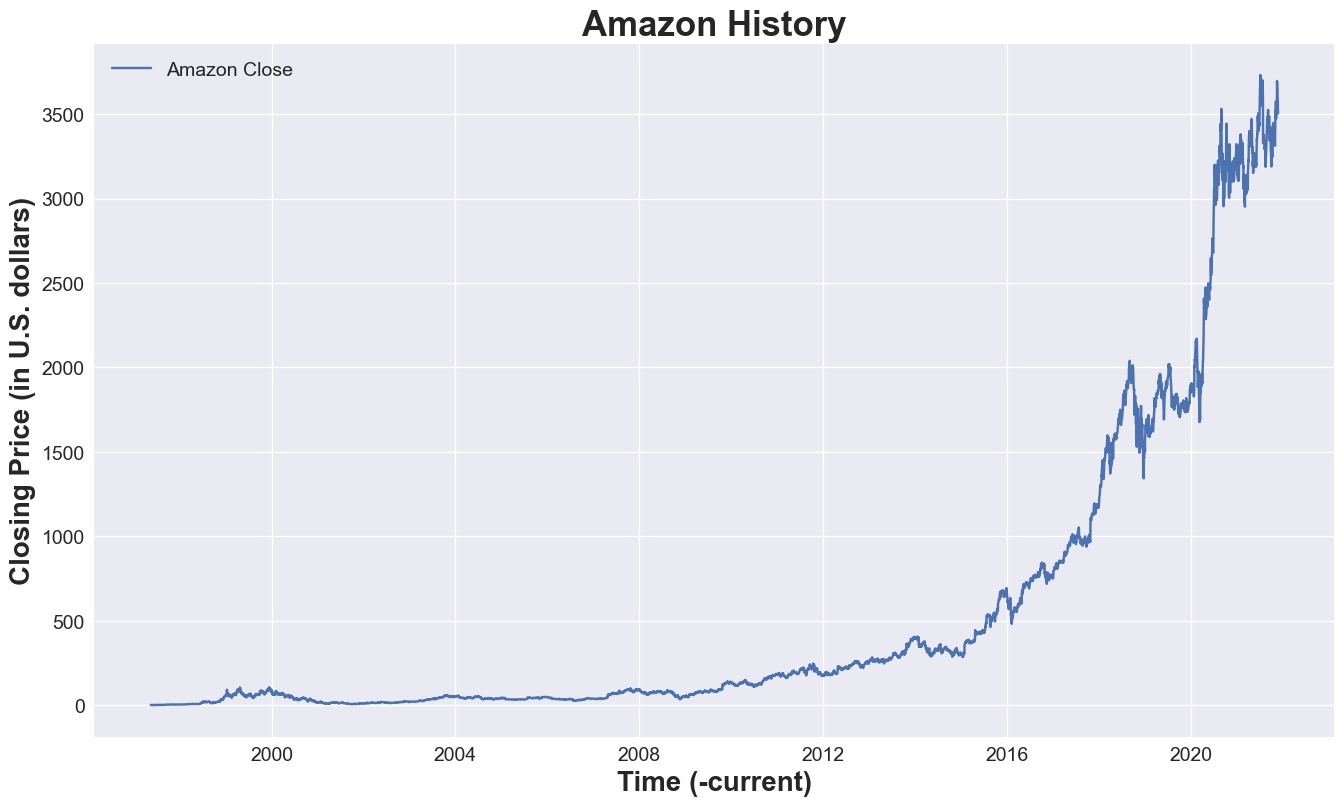

In [45]:
amazon = "AMZN" # Amazon Stock
amazon_ticker = yf.Ticker(amazon)
df_history_amazon = get_historial_data(amazon_ticker)
plot_historical_data(df_history_amazon, "Amazon")

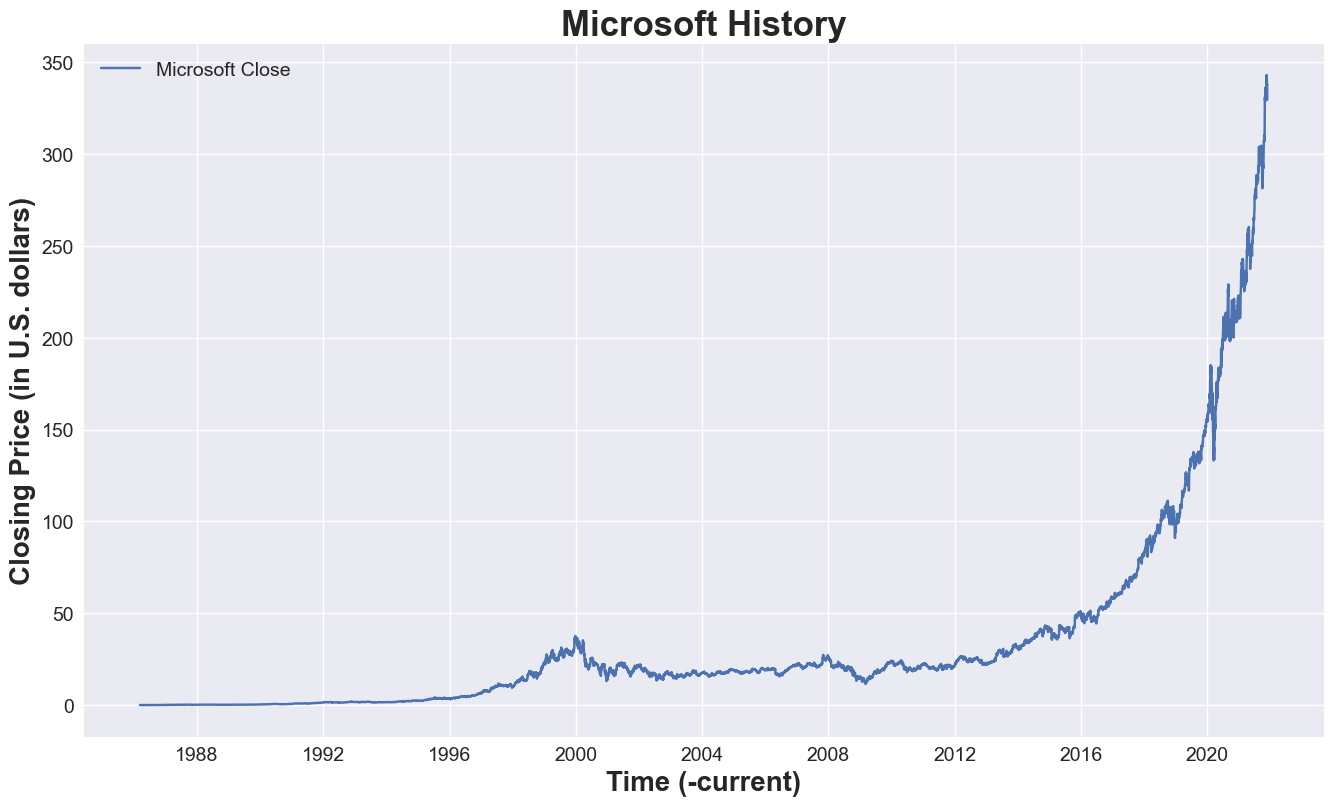

In [47]:
microsoft = "MSFT" # Microsoft Stock
microsoft_ticker = yf.Ticker(microsoft)
df_history_microsoft = get_historial_data(microsoft_ticker)
plot_historical_data(df_history_microsoft, "Microsoft")

In [48]:
stock = "^GSPC" # stock symbol ^GSPC, ^DJI, ^NDX
stock_ticker = yf.Ticker(stock)

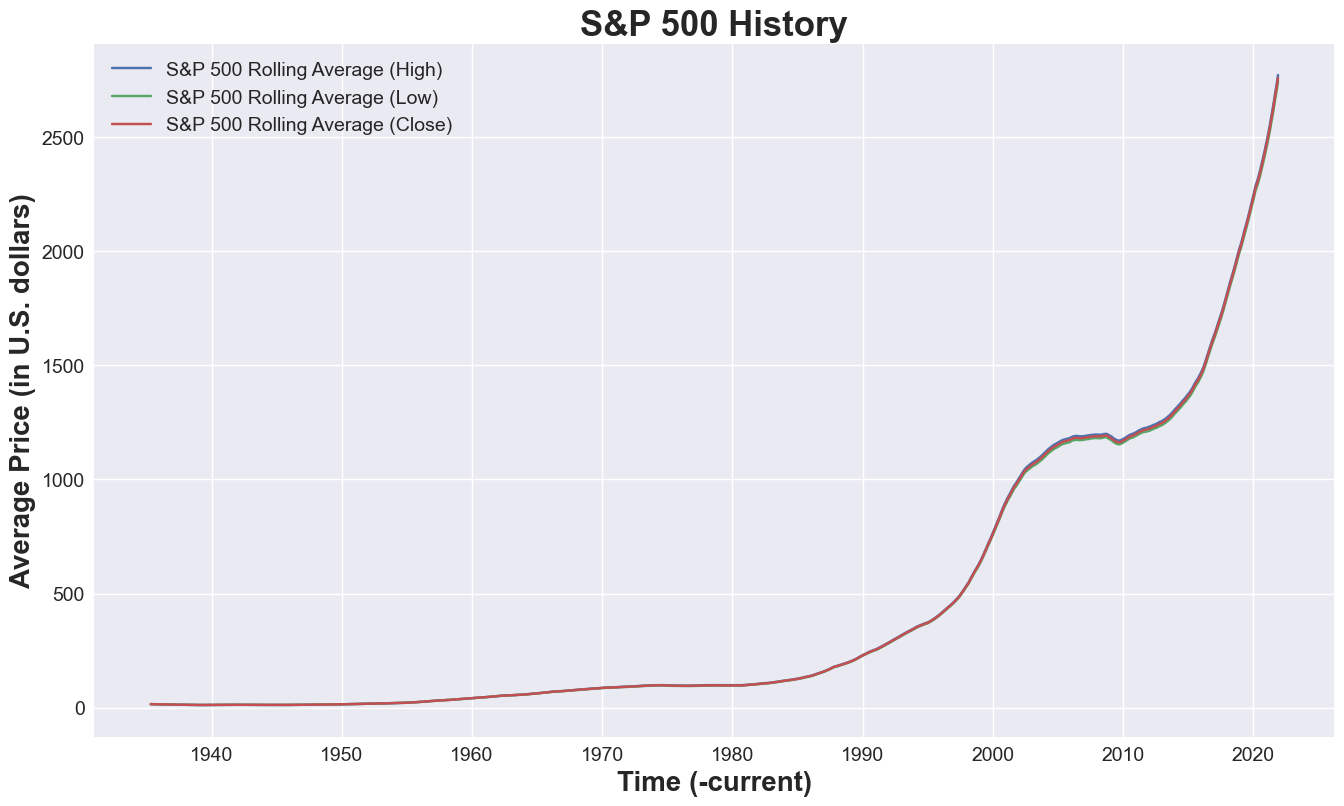

In [49]:
df_history = get_historial_data(stock_ticker) # gets historical data
plot_historical_rolling_average(df_history,"S&P 500")

In [50]:
df_history_monthly = get_monthly_historial_data(stock) # gets monthly historical data
monthly_return = df_history_monthly["Close"].pct_change(1)
df_history_monthly["Monthly Return"] = monthly_return

[*********************100%***********************]  1 of 1 completed


{'01': 0.07868440166582613, '02': 0.029728889343927145, '03': 0.01792425624958849, '04': 0.03931349831373798, '05': -0.0657777313668354, '06': 0.0689301639982407, '07': 0.013128152166957952, '08': -0.018091627240523933, '09': 0.017181177931020697, '10': 0.020431770513684056, '11': 0.034047037714499906, '12': 0.02858981890573009}


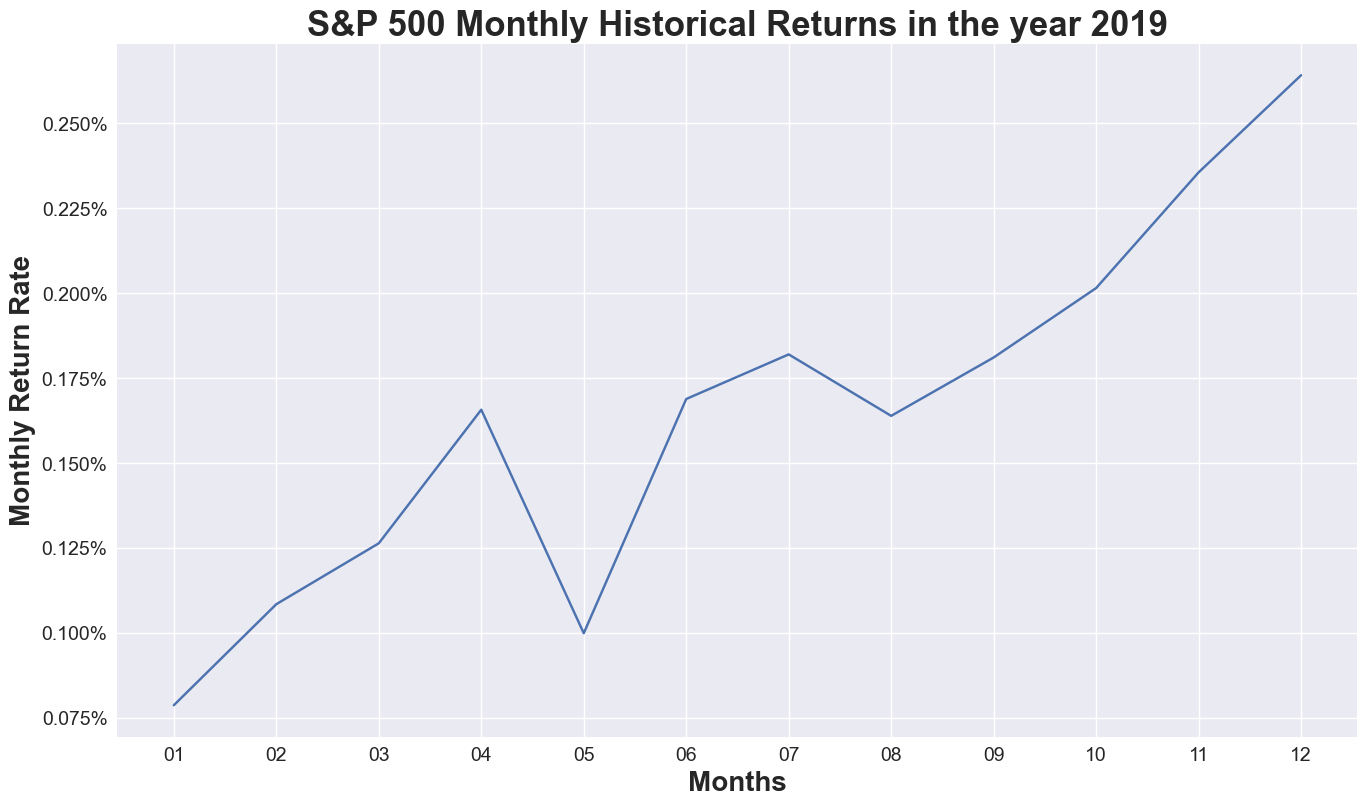

In [51]:
plot_monthly_returns_accumulative_year(df_history_monthly, "S&P 500", 2019)

In [52]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23590 entries, 1927-12-30 to 2021-11-26
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   23590 non-null  float64
 1   High                   23590 non-null  float64
 2   Low                    23590 non-null  float64
 3   Close                  23590 non-null  float64
 4   Volume                 23590 non-null  int64  
 5   Dividends              23590 non-null  int64  
 6   Stock Splits           23590 non-null  int64  
 7   Rolling Average High   21766 non-null  float64
 8   Rolling Average Low    21766 non-null  float64
 9   Rolling Average Close  21766 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.0 MB


In [53]:
# deletes the Dividends and Stock Splits columns from data; we don't need them
df_history.drop("Dividends", axis=1, inplace=True)
df_history.drop("Stock Splits", axis=1, inplace=True)

# makes daily return column in df_history
daily_return = df_history["Close"].pct_change(1)
df_history["Daily Return"] = daily_return

# create the learn and test data frames
df_history_learn = df_history.loc["1980":"2000"]
df_history_test = df_history.loc["2000":"2020"]

# print df_history!
df_history

,Open,High,Low,Close,Volume,Rolling Average High,Rolling Average Low,Rolling Average Close,Daily Return
Date,,,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,NaN,NaN,NaN,NaN
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,NaN,NaN,NaN,0.005663
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,NaN,NaN,NaN,-0.002252
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,NaN,NaN,NaN,-0.009594
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,NaN,NaN,NaN,0.006268
...,...,...,...,...,...,...,...,...,...
2021-11-19,4708.439941,4717.750000,4694.220215,4697.959961,3265600000,2767.051151,2738.910959,2754.056223,-0.001399
2021-11-22,4712.000000,4743.830078,4682.169922,4682.939941,3206280000,2768.553551,2740.385168,2755.527467,-0.003197
2021-11-23,4678.479980,4699.390137,4652.660156,4690.700195,3428780000,2770.029907,2741.839453,2757.001812,0.001657


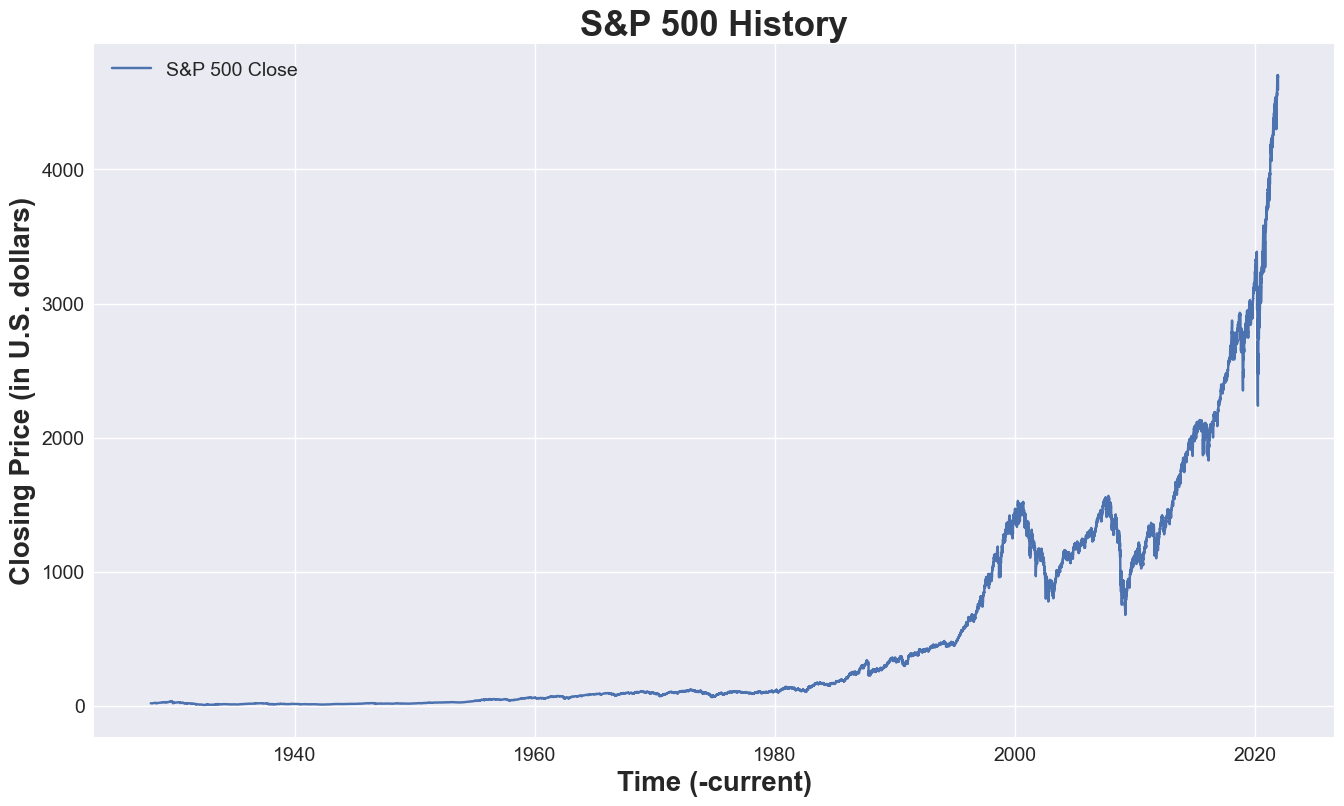

In [54]:
plot_historical_data(df_history, "S&P 500")

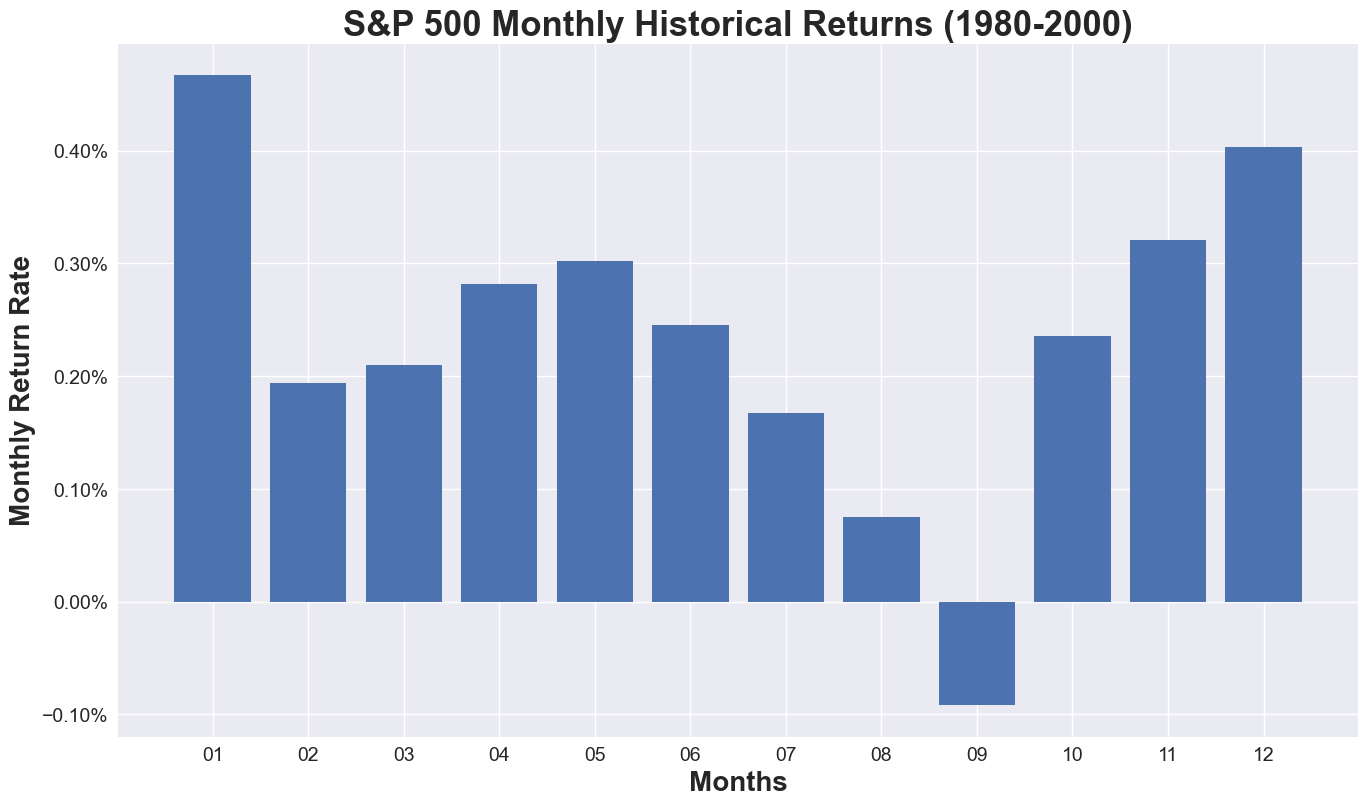

In [55]:
plot_monthly_returns("S&P 500", df_history.loc["1980":"2000"])

In [56]:
# plot_monthly_returns_accumulative(monthly_return_rate, "S&P 500")

{'01': -0.06881722621461728, '02': 0.008539042758088922, '03': 0.024254986404143253, '04': -0.02688714062127162, '05': 0.09198919079889456, '06': -0.008886365681221697, '07': -0.005223158411739148, '08': -0.09431418479162912, '09': -0.051184306456431905, '10': -0.006698212301042394, '11': 0.05993421454178649, '12': 0.024827757338752088}


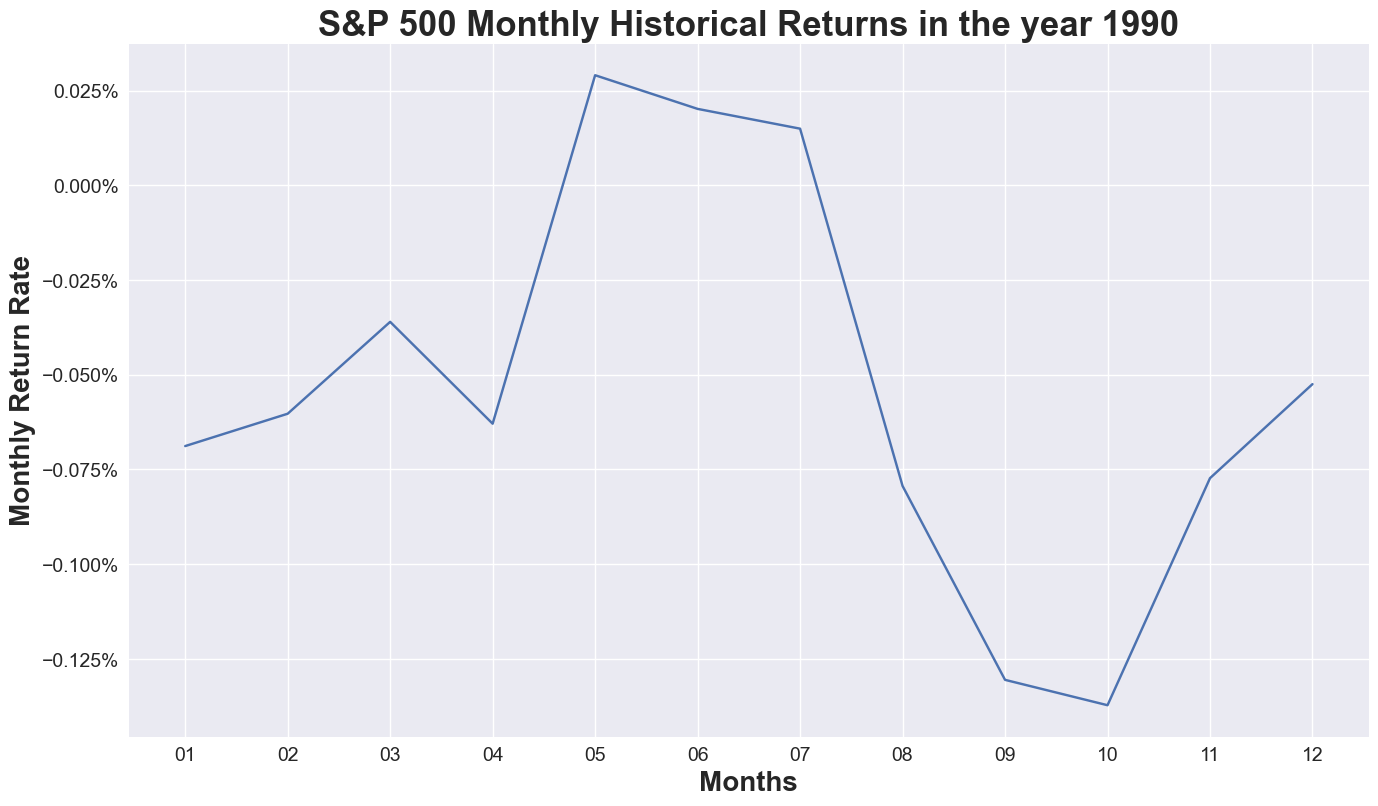

In [57]:
plot_monthly_returns_accumulative_year(df_history_monthly, "S&P 500", 1990)

In [58]:
from bokeh.plotting import figure, show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [59]:
df_history_monthly_test = df_history_monthly.loc["9-2000":"9-2020"]

investment_cycle(df_history_monthly_test, init_investment=df_history_monthly_test["Close"][0], buy=(10,6,3), sell=(9,5,2), name="S&P 500")

In [60]:
stock_symbol = "^GSPC"
stock_ticker = yf.Ticker(stock_symbol)
stock_short_name = stock_ticker.info["shortName"]
data = yf.download(stock_symbol, start="2020-01-01", end="2021-10-16")

[*********************100%***********************]  1 of 1 completed


In [61]:
data.reset_index(inplace=True)
print(data.columns)
print()
print(data)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

          Date         Open         High          Low        Close  \
0   2020-01-02  3244.669922  3258.139893  3235.530029  3257.850098   
1   2020-01-03  3226.360107  3246.149902  3222.340088  3234.850098   
2   2020-01-06  3217.550049  3246.840088  3214.639893  3246.280029   
3   2020-01-07  3241.860107  3244.909912  3232.429932  3237.179932   
4   2020-01-08  3238.590088  3267.070068  3236.669922  3253.050049   
..         ...          ...          ...          ...          ...   
447 2021-10-11  4385.439941  4415.879883  4360.589844  4361.189941   
448 2021-10-12  4368.310059  4374.890137  4342.089844  4350.649902   
449 2021-10-13  4358.009766  4372.870117  4329.919922  4363.799805   
450 2021-10-14  4386.750000  4439.729980  4386.750000  4438.259766   
451 2021-10-15  4447.689941  4475.819824  4447.689941  4471.370117   

       Adj Close      Volume  
0    3257.850098  3458250000  
1    3234

# [mlpfinance documentation](https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh)

## Need to find a better representation

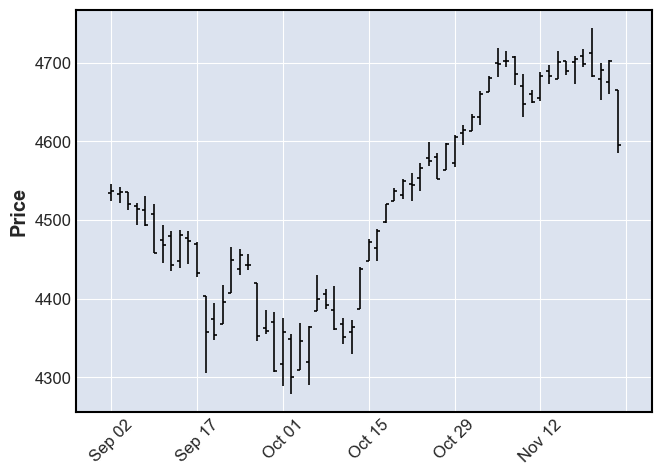

In [62]:
import mplfinance as mpf
mpf.plot(df_history[-60:])
plt.show()

In [63]:
inc = data["Close"] > data["Open"]
dec = data["Open"] > data["Close"]
w = 12 * 60 * 60 * 1000
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

In [64]:
p = figure(
    x_axis_type = "datetime",
    plot_width = 1000,
    tools = TOOLS,
    title = stock_short_name + " - Candlestick Chart 2020-present"
)

In [65]:
p.segment(data["Date"], data["High"], data["Date"], data["Low"], color="black")

GlyphRenderer(id='2126', ...)

In [66]:
p.vbar(
    data["Date"][inc],
    w,
    data["Open"][inc],
    data["Close"][inc],
    fill_color="green",
    line_color="green"
)
p.vbar(
    data["Date"][dec],
    w,
    data["Open"][dec],
    data["Close"][dec],
    fill_color="red",
    line_color="red"
)

GlyphRenderer(id='2140', ...)

In [67]:
show(p)